In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Train/Val/Test data is composed of 4 numpy.ndarray objects:

    x: a 4D tensor of shape (#timeslots, #lookback_window, #nodes, #flow_types)

    y: a 4D tensor of shape (#timeslots, #predict_horizon, #nodes, #flow_types). x and y are processed as a sliding window view.

    x_offset: a tensor indicating offsets of x's lookback window. Note that the lookback window of data x is not consistent in time.

    y_offset: a tensor indicating offsets of y's predict horizon.

For all datasets, previous 2-hour flows as well as previous 3-day flows around the predicted time are used to predict the flows for the next time step.

In [17]:
nyc_taxi_test = np.load('./NYCTaxi/test.npz')

In [18]:
nyc_taxi_test.files

['x', 'y', 'x_offsets', 'y_offsets']

In [19]:
nyc_taxi_test['x'].shape

(546, 35, 200, 2)

In [20]:
nyc_taxi_test['y'].shape

(546, 1, 200, 2)

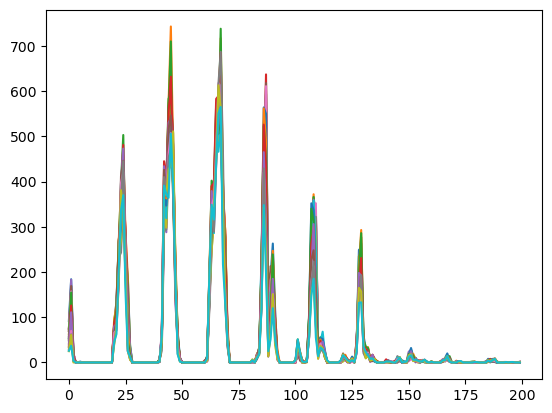

In [21]:
for ii in range(0, 20):
    plt.plot(nyc_taxi_test['x'][ii,0,:,0])


Traffic flow against time

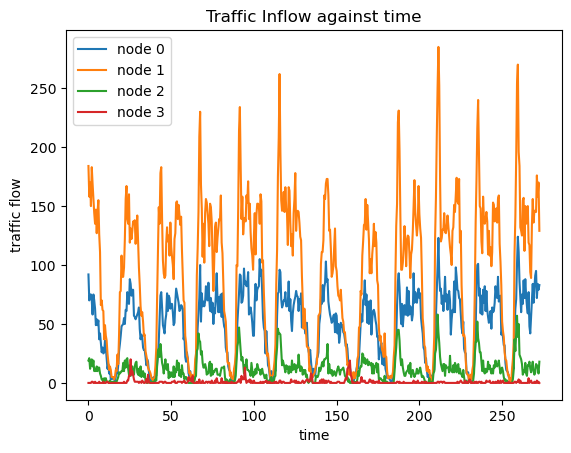

In [39]:
for ii in range(0, 4):
    len_time = len(nyc_taxi_test['x'][:,0,ii,0])

    time_interval = np.arange(0, len_time)/2
    plt.plot(time_interval, nyc_taxi_test['x'][:,0,ii,0])
    
    plt.title('Traffic Inflow against time')
    plt.xlabel('time (h)')
    plt.ylabel('traffic flow')
plt.legend(['node 0', 'node 1', 'node 2', 'node 3'])


Outflow against time

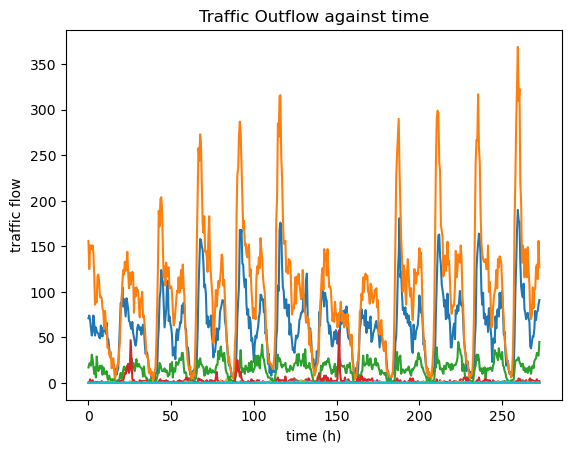

In [38]:
for ii in range(0, 10):
    len_time = len(nyc_taxi_test['x'][:,0,ii,1])

    time_interval = np.arange(0, len_time)/2
    plt.plot(time_interval, nyc_taxi_test['x'][:,0,ii,1])
    plt.title('Traffic Outflow against time')
    plt.xlabel('time (h)')
    plt.ylabel('traffic flow')


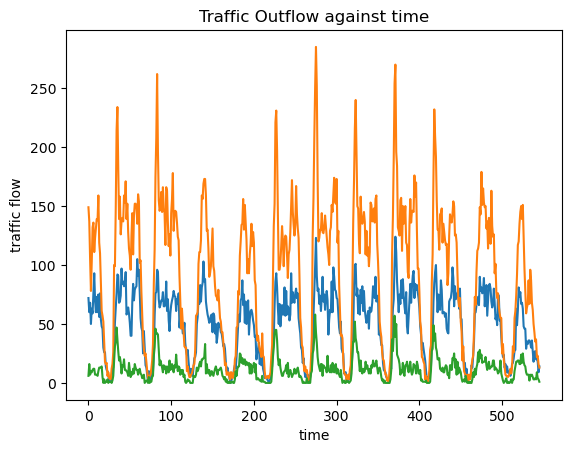

In [30]:
for ii in range(0, 3):
    plt.plot(nyc_taxi_test['y'][:,0,ii,0])
    plt.title('Traffic Outflow against time')
    plt.xlabel('time')
    plt.ylabel('traffic flow')


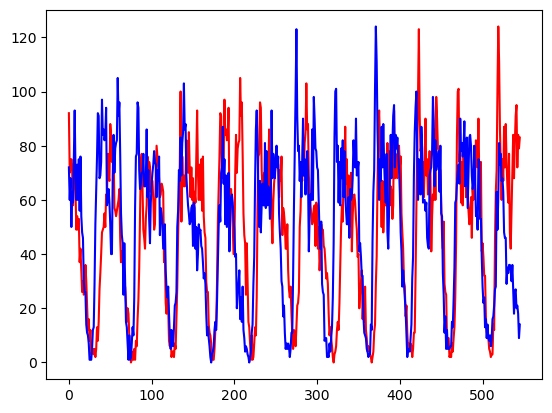

In [26]:
plt.plot(nyc_taxi_test['x'][:,0,0,0], 'r')
plt.plot(nyc_taxi_test['y'][:,0,0,0], 'b')